##MINI PROJE 2 "WALMART" GRUPO 6 DNC

###ANALISE DE FATURAMENTO DAS LOJAS WALMART PARA APONTAR A MELHOR, PARA EXPANÇÃO DE TAMANHO

In [ ]:
# Importção das bibliotecas necessarias para manipulação, calculo e grafico do
# Dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importação do Dataset "walmart.csv"
df = pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# Verificando a quantidade de linhas e colunas do Dataset.
df.shape

(6435, 8)

In [ ]:
# Verificando tipos de variaveis e, linhas não preenchidas.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# Descrição panoramica do Dataset.
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


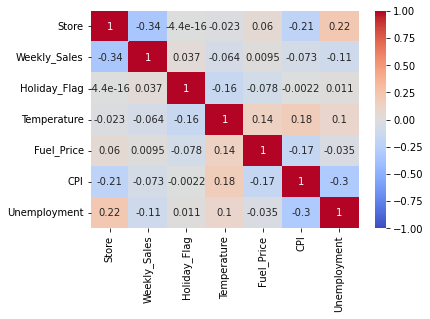

In [ ]:
# mapa de calor para tentar encontrar a melhor correlação entre as variaveis. 
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

In [ ]:
# Vendas >= média na semana.
df = df.loc[df['Weekly_Sales'] >= 1.046965e+06]
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6337,45,17-12-2010,1123282.85,0,30.51,3.140,182.517732,8.724
6338,45,24-12-2010,1682862.03,0,30.59,3.141,182.544590,8.724
6386,45,25-11-2011,1170672.94,1,48.71,3.492,188.350400,8.523
6389,45,16-12-2011,1078905.68,0,39.93,3.413,188.797935,8.523


In [ ]:
# Selecionando todas as datas que possuia pelo menos um feriado.
df1 = df.loc[df['Holiday_Flag'] >= 1]
display(df1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
5819,41,30-12-2011,1264014.16,1,34.12,3.119,196.358610,6.759
5825,41,10-02-2012,1238844.56,1,22.00,3.103,196.919506,6.589
5855,41,07-09-2012,1392143.82,1,67.41,3.596,198.095048,6.432
6334,45,26-11-2010,1182500.16,1,46.15,3.039,182.783277,8.724


In [ ]:
# Agora com as datas com feriado, selecionei os indices de desempregos
# menor do que a média
df2 = df1.loc[df1['Unemployment'] <= 7.999151]
display(df2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742
83,1,09-09-2011,1540471.24,1,76.00,3.546,215.861056,7.962
...,...,...,...,...,...,...,...,...
5803,41,09-09-2011,1280958.97,1,58.31,3.566,194.638785,6.901
5814,41,25-11-2011,1906713.35,1,36.37,3.424,195.770400,6.759
5819,41,30-12-2011,1264014.16,1,34.12,3.119,196.358610,6.759
5825,41,10-02-2012,1238844.56,1,22.00,3.103,196.919506,6.589


In [ ]:
# Criado uma nova coluna de mês para minha melhor visualização.
df2['Month'] = df2['Date'].apply(lambda x: x[3:5])
display(df2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787,09
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838,11
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838,12
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742,02
83,1,09-09-2011,1540471.24,1,76.00,3.546,215.861056,7.962,09
...,...,...,...,...,...,...,...,...,...
5803,41,09-09-2011,1280958.97,1,58.31,3.566,194.638785,6.901,09
5814,41,25-11-2011,1906713.35,1,36.37,3.424,195.770400,6.759,11
5819,41,30-12-2011,1264014.16,1,34.12,3.119,196.358610,6.759,12
5825,41,10-02-2012,1238844.56,1,22.00,3.103,196.919506,6.589,02


In [ ]:
# fazendo a correlação entre faturamento mensal acima da média e taxa de 
# desemprego abaixo da média.
df2.loc[(df2['Weekly_Sales'] >= 1.046965e+06) & (df2['Unemployment'] < 7.999151)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787,09
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838,11
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838,12
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742,02
83,1,09-09-2011,1540471.24,1,76.00,3.546,215.861056,7.962,09
...,...,...,...,...,...,...,...,...,...
5803,41,09-09-2011,1280958.97,1,58.31,3.566,194.638785,6.901,09
5814,41,25-11-2011,1906713.35,1,36.37,3.424,195.770400,6.759,11
5819,41,30-12-2011,1264014.16,1,34.12,3.119,196.358610,6.759,12
5825,41,10-02-2012,1238844.56,1,22.00,3.103,196.919506,6.589,02


In [ ]:
# fazendo a correlação entre faturamento mensal acima da média e CPI 
# acima da média.
df2.loc[(df2['Weekly_Sales'] >= 1.046965e+06) & (df2['CPI'] > 171.578394	)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787,09
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838,11
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838,12
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742,02
83,1,09-09-2011,1540471.24,1,76.00,3.546,215.861056,7.962,09
...,...,...,...,...,...,...,...,...,...
5803,41,09-09-2011,1280958.97,1,58.31,3.566,194.638785,6.901,09
5814,41,25-11-2011,1906713.35,1,36.37,3.424,195.770400,6.759,11
5819,41,30-12-2011,1264014.16,1,34.12,3.119,196.358610,6.759,12
5825,41,10-02-2012,1238844.56,1,22.00,3.103,196.919506,6.589,02


In [ ]:
# A maior correlação encontrada foi entre "faturamento semanal" e "feriados"
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.442040,0.005075,-0.166054,0.041139,-0.046147,0.164762
Weekly_Sales,-0.442040,1.000000,0.059774,-0.011579,-0.022851,-0.003114,-0.196271
Holiday_Flag,0.005075,0.059774,1.000000,-0.168382,-0.066343,-0.014264,0.017296
Temperature,-0.166054,-0.011579,-0.168382,1.000000,0.124354,0.200719,0.060611
Fuel_Price,0.041139,-0.022851,-0.066343,0.124354,1.000000,-0.157596,-0.057423
CPI,-0.046147,-0.003114,-0.014264,0.200719,-0.157596,1.000000,-0.207441
Unemployment,0.164762,-0.196271,0.017296,0.060611,-0.057423,-0.207441,1.000000


In [ ]:
df2.loc[(df2['Weekly_Sales'] >= 1.046965e+06) & (df2['Holiday_Flag'] == 1	)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787,09
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838,11
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838,12
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742,02
83,1,09-09-2011,1540471.24,1,76.00,3.546,215.861056,7.962,09
...,...,...,...,...,...,...,...,...,...
5803,41,09-09-2011,1280958.97,1,58.31,3.566,194.638785,6.901,09
5814,41,25-11-2011,1906713.35,1,36.37,3.424,195.770400,6.759,11
5819,41,30-12-2011,1264014.16,1,34.12,3.119,196.358610,6.759,12
5825,41,10-02-2012,1238844.56,1,22.00,3.103,196.919506,6.589,02


In [ ]:
df = pd.read_csv('Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
#Descobrir o valor maximo de venda semanal.
valor_max = df['Weekly_Sales'].max()
valor_max

3818686.45

In [ ]:
#Descobrir a loja com o valor maximo de venda semanal.
df_maior = df.loc[df['Weekly_Sales']== 3818686.45]
df_maior

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.54459,8.724


In [ ]:
# Utiliza
df_Store_20 = df.loc[(df['Store'] == 20) & (df['Weekly_Sales'] > 1.046965e+06   ) & (df['Unemployment'] <= 7.999151) & (df['CPI'] > 171.578394)]
df_14
df_14.shape

## Encontrado o valor maximo de venda semanal, e verificado que é em uma
## semana sem feriado, vou selecionar todas as vendas dessa loja 14

# selecionado todas as vendas da loja 14.
df_store = df.loc[df['Store'] == 2]
df_store

In [ ]:
df_a = df_store.loc[df_store['Holiday_Flag'] == 1]
df_max1 = df_a['Weekly_Sales'].max()
df_max1

2921709.71

In [ ]:
df_max = df1['Weekly_Sales'].max()
df_max

3004702.33

In [ ]:
df.loc[df['Weekly_Sales']== 3818686.45]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.54459,8.724


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

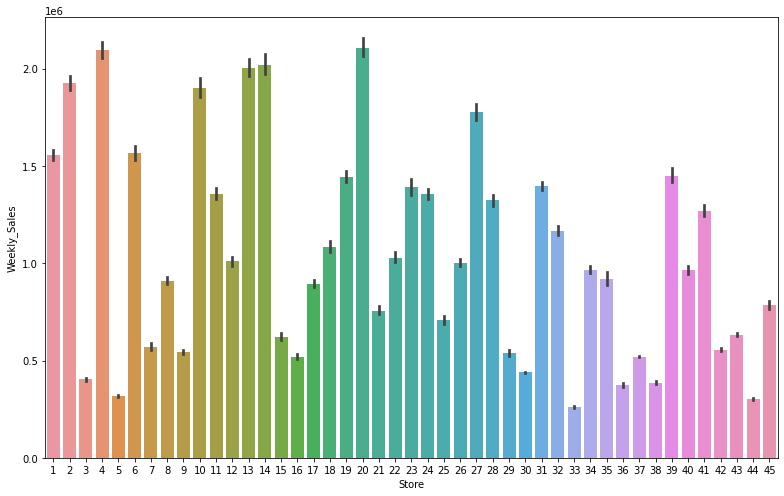

In [ ]:
fig, ax = plt.subplots(figsize=(11,7))
sns.barplot(x = df['Store'], y = df['Weekly_Sales'], ax = ax, data = df)
fig.tight_layout();

In [ ]:
#Depois de visualizar no grafico, as três lojas com mais vendas acumuladas no total.
#Utilizando as correlações entre  vendas semanais maior que a média, vendas semanais com menor variação entre semanas
# Taxa de desemprego menor que a média e indice de preço ao consumidor cheguei na loja 20
# Obs: se quizerem codar com as outras duas lojas com maior venda acumulada, sendo as lojas 4 e 14,
# Não tem nenhuma linha com todas essas correlações, já a loja "Store 20" de 143 semanas existem 135 semanas com essas correlaçôes.

df_Store_20 = df.loc[(df['Store'] == 20) & (df['Weekly_Sales'] > 1.046965e+06	) & (df['Unemployment'] <= 7.999151) & (df['CPI'] > 171.578394)]
df_Store_20
display(df_Store_20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2725,20,02-04-2010,2405395.22,0,51.00,2.850,204.025284,7.856
2726,20,09-04-2010,2007796.26,0,65.10,2.869,203.848813,7.856
2727,20,16-04-2010,1985784.59,0,55.43,2.899,203.730749,7.856
2728,20,23-04-2010,1878862.42,0,50.65,2.902,203.690559,7.856
2729,20,30-04-2010,1919053.21,0,54.75,2.921,203.650369,7.856
...,...,...,...,...,...,...,...,...
2855,20,28-09-2012,2008350.58,0,58.65,3.997,215.736716,7.280
2856,20,05-10-2012,2246411.89,0,60.77,3.985,215.925886,7.293
2857,20,12-10-2012,2162951.36,0,47.20,4.000,216.115057,7.293
2858,20,19-10-2012,1999363.49,0,56.26,3.969,216.146470,7.293


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0, 0.5, 'Contagem')

<Figure size 1584x1008 with 0 Axes>

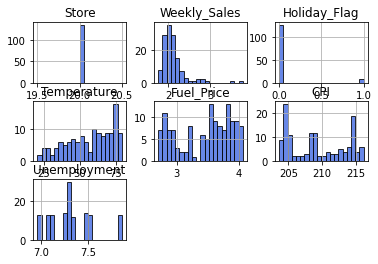

In [ ]:
# Grafico com todas as correlações Store 20
plt.figure(figsize = (22, 14))
df[df['Store'] == 20][df['Weekly_Sales'] > 1.046965e+06] [df['Unemployment'] <= 7.999151] [df['CPI'] > 171.578394][df["Store"] == 20].hist(bins = 20, ec = "k", alpha = .8, color = "royalblue")
plt.title("")
plt.xlabel("Notas")
plt.ylabel("Contagem")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0, 0.5, 'Contagem')

<Figure size 1584x1008 with 0 Axes>

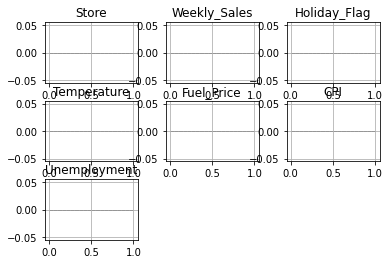

In [ ]:
# Grafico com todas as correlações Store 14
plt.figure(figsize = (22, 14))
df[df['Store'] == 14][df['Weekly_Sales'] > 1.046965e+06] [df['Unemployment'] <= 7.999151] [df['CPI'] > 171.578394][df["Store"] == 20].hist(bins = 20, ec = "k", alpha = .8, color = "royalblue")
plt.title("")
plt.xlabel("Notas")
plt.ylabel("Contagem")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0, 0.5, 'Contagem')

<Figure size 1584x1008 with 0 Axes>

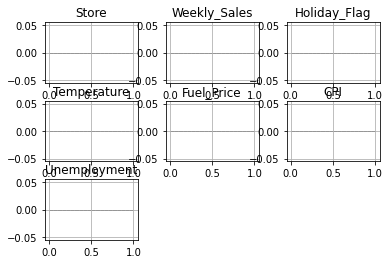

In [ ]:
# Grafico com todas as correlações Store 4
plt.figure(figsize = (22, 14))
df[df['Store'] == 4][df['Weekly_Sales'] > 1.046965e+06] [df['Unemployment'] <= 7.999151] [df['CPI'] > 171.578394][df["Store"] == 20].hist(bins = 20, ec = "k", alpha = .8, color = "royalblue")
plt.title("")
plt.xlabel("Notas")
plt.ylabel("Contagem")

## Com a Plotagem de todas as correlações, foi observado a loja com 'Store 20',
## tendo a maior capacidade para a expansão da loja Walmart.
## Ela possui:
## - A maior venda acumulada de todas as semanas
## - A menor variação de vendas semanais entre todos os periodos
## - O menor indice de taxa de desemprego, considerando os valores abaixo da média.
## - O melhor indice de preço ao consumidor, considerando os valores acima da média.